<a href="https://colab.research.google.com/github/Nurguyan/Ice-Hockey-Match-Outcome-Predictor/blob/main/Ice-Hockey-Match-Outcome-Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

url = 'https://raw.githubusercontent.com/Nurguyan/Ice-Hockey-Match-Outcome-Predictor/main/data/data.csv'

df = pd.read_csv(url)
print(df[:2])

         Date Location Team   GF   GA  ...    Sh%    Sv%    PP%    PK%  Class
0  07/09/2018     Home  LON  247  161  ...  36.85  29.08  26.17  82.06   Loss
1  07/09/2018     Away  TER  223  144  ...  40.69  32.31  32.44  84.10    Win

[2 rows x 12 columns]


In [2]:
from sklearn import preprocessing

#we don't need a date since it should not affect on matches' outcome
df = df.drop(['Date'], axis=1)

#convert categorical data into integers
df = pd.get_dummies(df, columns=['Team'])
df['Location'] = (df['Location'] == 'Home').astype(int)
df['Class'] = (df['Class'] == 'Win').astype(int)

print(df[:5])
df.info()

   Location   GF   GA   GF%  ...  Team_STJ  Team_TER  Team_VAL  Team_WIS
0         1  247  161  5.15  ...         0         0         0         0
1         0  223  144  4.65  ...         0         1         0         0
2         1  202  211  4.21  ...         0         0         0         0
3         0  200  207  4.17  ...         0         0         0         0
4         0  207  151  4.31  ...         1         0         0         0

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  1008 non-null   int64  
 1   GF        1008 non-null   int64  
 2   GA        1008 non-null   int64  
 3   GF%       1008 non-null   float64
 4   GA%       1008 non-null   float64
 5   Sh%       1008 non-null   float64
 6   Sv%       1008 non-null   float64
 7   PP%       1008 non-null   float64
 8   PK%       1008 non-null   float64
 9 

In [3]:
#normalize features
x = df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df[:5])

    0         1         2         3         4   ...   16   17   18   19   20
0  1.0  0.728682  0.268293  0.728625  0.266862  ...  0.0  0.0  0.0  0.0  0.0
1  0.0  0.542636  0.164634  0.542751  0.164223  ...  0.0  0.0  1.0  0.0  0.0
2  1.0  0.379845  0.573171  0.379182  0.574780  ...  0.0  0.0  0.0  0.0  0.0
3  0.0  0.364341  0.548780  0.364312  0.548387  ...  0.0  0.0  0.0  0.0  0.0
4  0.0  0.418605  0.207317  0.416357  0.208211  ...  0.0  1.0  0.0  0.0  0.0

[5 rows x 21 columns]


In [4]:
df_test = df.sample(frac=0.2, random_state=1337)
df_train = df.drop(df_test.index)
target_df_train = df_train.pop(9)
target_df_test = df_test.pop(9)

y_train = target_df_train.to_numpy(dtype='float32')
y_test = target_df_test.to_numpy(dtype='float32')
x_train = df_train.iloc[:,0:].to_numpy(dtype='float32')
x_test = df_test.iloc[:,0:].to_numpy(dtype='float32')

print("Using %d samples for training and %d for validation" % (len(df_train), len(df_test)))

Using 806 samples for training and 202 for validation


In [5]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=300, verbose=1)

Epoch 1/300
26/26 [==============================] - 0s 7ms/step - loss: 0.6592 - accuracy: 0.5794 - val_loss: 0.6261 - val_accuracy: 0.6337
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6154 - val_loss: 0.6242 - val_accuracy: 0.6287
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6253 - val_loss: 0.6218 - val_accuracy: 0.6386
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6439 - val_loss: 0.6220 - val_accuracy: 0.6386
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6439 - val_loss: 0.6235 - val_accuracy: 0.6386
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6439 - val_loss: 0.6224 - val_accuracy: 0.6386
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6439 - val_loss: 0.6249 - val_accuracy: 0.6386
Epoch 8/300
2

Text(0.5, 0, 'Epochs')

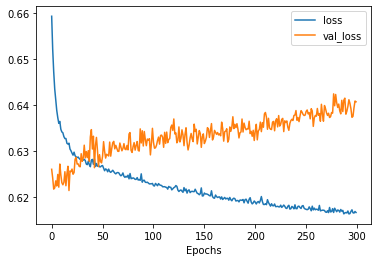

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', score)

test loss, test acc: [0.640684962272644, 0.6287128925323486]
